In [ ]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [2]:
# Query to chat GPT - write a python script to load my data in csv format to a python dataframe
import pandas as pd

# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

# Load the CSV file into a DataFrame
data_frame = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data_frame.head())


     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [8]:
file_path_dl = r"C:\Users\Raegan\Downloads\GenerativeAI_FinalProject_UsedCarPricing.csv"  #remname file
try:
    data_frame.to_csv(file_path_dl, index=False)
    print(f'DataFrame saved to {file_path_dl}')
except Exception as e:
    print(f'An error occurred: {e}')

DataFrame saved to C:\Users\Raegan\Downloads\GenerativeAI_FinalProject_UsedCarPricing.csv


In [14]:
# write a python code to identify missing values and duplicate entries
# identifying colums with missing values and fill blank cells with average value of the columns
# identify and drop the duplicate entries of the data
# ensure computation is for numeric data only
# import pandas as pd

# # Load the CSV file into a DataFrame
# file_path = 'your_file_path.csv'  # Replace with your file path
# data_frame = pd.read_csv(file_path)

# Identify columns with missing values
missing_values = data_frame.isnull().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Fill missing values with the average of their respective columns (only for numeric columns)
numeric_columns = data_frame.select_dtypes(include='number').columns
data_frame[numeric_columns] = data_frame[numeric_columns].fillna(data_frame[numeric_columns].mean())

# Print the DataFrame after filling missing values
print("\nDataFrame after filling missing values:")
print(data_frame)

# Identify and drop the duplicate entries
duplicates = data_frame.duplicated().sum()
print("\nNumber of duplicate entries:", duplicates)

data_frame.drop_duplicates(inplace=True)

# Print the DataFrame after dropping duplicates
print("\nDataFrame after dropping duplicates:")
print(data_frame)


Columns with missing values:
tax    3
dtype: int64

DataFrame after filling missing values:
         model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0       Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1        Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2        Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3       Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4       Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
...        ...   ...          ...      ...      ...    ...   ...         ...   
17961    B-MAX  2017       Manual    16700   Petrol  150.0  47.1         1.4   
17962    B-MAX  2014       Manual    40700   Petrol   30.0  57.7         1.0   
17963    Focus  2015       Manual     7010   Diesel   20.0  67.3         1.6   
17964       KA  2018       Manual     5007   Petrol  145.0  57.7         1.2   
17965    Focus  2015       M

In [20]:
# Use one hot encoding to convert non numeric columns first then 
# write a Python code to identify 5 attributes that have the highest correlation with the price parameter

# import pandas as pd

# # Load your data into a DataFrame
# file_path = 'your_file_path.csv'  # Replace with your actual file path
# data_frame = pd.read_csv(file_path)

# Perform one-hot encoding on non-numeric columns
data_frame_encoded = pd.get_dummies(data_frame, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = data_frame_encoded.corr()

# Check if 'Price' exists in the DataFrame
if 'price' in correlation_matrix.columns:
    # Get the correlation of each attribute with the 'Price' column
    price_correlation = correlation_matrix['price'].drop('price')  # Drop the correlation of 'Price' with itself

    # Identify the 5 attributes with the highest absolute correlation to 'Price'
    top_5_attributes = price_correlation.abs().nlargest(5)

    # Print the results
    print("Top 5 attributes with the highest correlation with 'Price':")
    print(top_5_attributes)
else:
    print("'Price' column not found in the DataFrame.")


Top 5 attributes with the highest correlation with 'Price':
year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


In [22]:
# write a python script to count the number of cars under each unique value of fuelType attribute

# Count the number of cars under each unique value of the 'fuelType' attribute
fuel_type_counts = data_frame['fuelType'].value_counts()

# Print the results
print("Number of cars under each unique value of 'fuelType':")
print(fuel_type_counts)

Number of cars under each unique value of 'fuelType':
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


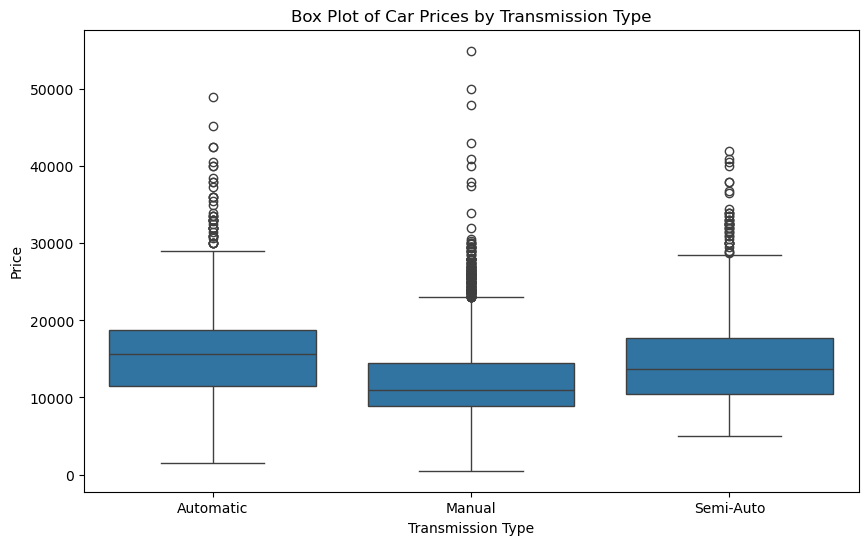

In [24]:
# write a python script to Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers.
# Use the Seaborn library for creating the plot.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# file_path = 'your_file_path.csv'  # Replace with your actual file path
# data_frame = pd.read_csv(file_path)

# Ensure 'transmission' and 'price' columns exist in the DataFrame
# You might need to replace these column names with the exact names in your dataset
if 'transmission' in data_frame.columns and 'price' in data_frame.columns:
    # Create a box plot to visualize price distribution by transmission type
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='transmission', y='price', data=data_frame)
    
    # Adding titles and labels
    plt.title('Box Plot of Car Prices by Transmission Type')
    plt.xlabel('Transmission Type')
    plt.ylabel('Price')
    
    # Show the plot
    plt.show()
else:
    print("Columns 'transmission' or 'price' not found in the DataFrame.")


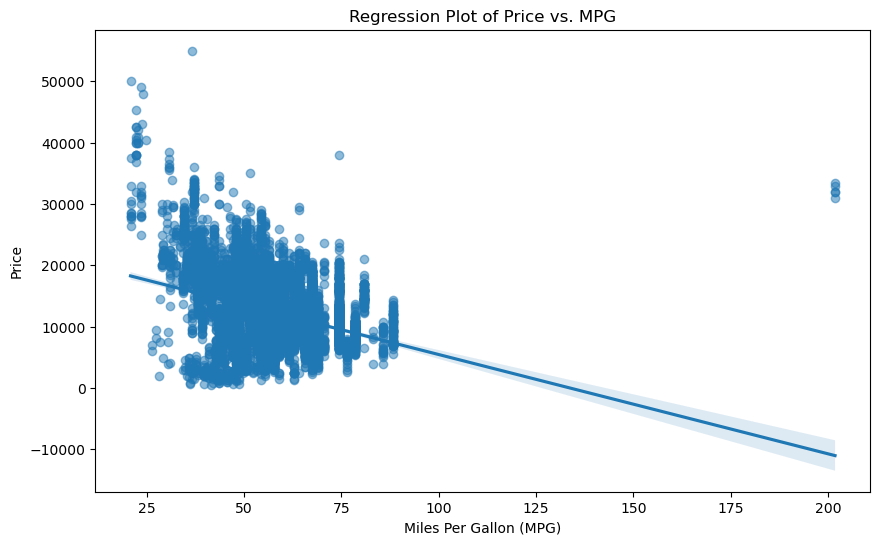

In [26]:
# write python code to generate the regression plot between mpg parameter and the price to determine the correlation type between the two.
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# Load your data into a DataFrame
# file_path = 'your_file_path.csv'  # Replace with your actual file path
# data_frame = pd.read_csv(file_path)

# Ensure 'mpg' and 'price' columns exist in the DataFrame
if 'mpg' in data_frame.columns and 'price' in data_frame.columns:
    # Create a regression plot between 'mpg' and 'price'
    plt.figure(figsize=(10, 6))
    sns.regplot(x='mpg', y='price', data=data_frame, scatter_kws={'alpha': 0.5})
    
    # Adding titles and labels
    plt.title('Regression Plot of Price vs. MPG')
    plt.xlabel('Miles Per Gallon (MPG)')
    plt.ylabel('Price')
    
    # Show the plot
    plt.show()
else:
    print("Columns 'mpg' or 'price' not found in the DataFrame.")


In [28]:
# write python code to Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your data into a DataFrame
# file_path = 'your_file_path.csv'  # Replace with your actual file path
# data_frame = pd.read_csv(file_path)

# Ensure 'mpg' and 'price' columns exist in the DataFrame
if 'mpg' in data_frame.columns and 'price' in data_frame.columns:
    # Select features and target variable
    X = data_frame[['mpg']]  # Feature
    y = data_frame['price']   # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print the results
    print(f'R^2: {r2}')
    print(f'Mean Squared Error (MSE): {mse}')
else:
    print("Columns 'mpg' or 'price' not found in the DataFrame.")


R^2: 0.15043437410724703
Mean Squared Error (MSE): 19049855.140110776


In [30]:
# write python code to Fit a linear regression model to predict the price using the following set of features.
# year, mileage, tax, mpg and engineSize.
# Calculate the R^2 and MSE values for this model.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your data into a DataFrame
# file_path = 'your_file_path.csv'  # Replace with your actual file path
# data_frame = pd.read_csv(file_path)

# Ensure the required columns exist in the DataFrame
required_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
if all(col in data_frame.columns for col in required_columns):
    # Select features and target variable
    X = data_frame[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
    y = data_frame['price']   # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print the results
    print(f'R^2: {r2}')
    print(f'Mean Squared Error (MSE): {mse}')
else:
    print("One or more required columns are not found in the DataFrame.")


R^2: 0.6917125923771679
Mean Squared Error (MSE): 6912744.910746431


In [34]:
# write a python code for the question above to , create a pipeline model object that uses standard scalar, 
# second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your data into a DataFrame
# file_path = 'your_file_path.csv'  # Replace with your actual file path
# data_frame = pd.read_csv(file_path)

# Ensure the required columns exist in the DataFrame
required_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
if all(col in data_frame.columns for col in required_columns):
    # Select features and target variable
    X = data_frame[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
    y = data_frame['price']   # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Step 1: Standard Scaler
        ('poly_features', PolynomialFeatures(degree=2)),  # Step 2: Polynomial Features
        ('linear_model', LinearRegression())  # Step 3: Linear Regression Model
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate R^2 and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print the results
    print(f'R^2: {r2}')
    print(f'Mean Squared Error (MSE): {mse}')
else:
    print("One or more required columns are not found in the DataFrame.")


R^2: 0.12122807147171
Mean Squared Error (MSE): 19704749.614920247


In [36]:
# For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. 
# Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Load your data into a DataFrame
# file_path = 'your_file_path.csv'  # Replace with your actual file path
# data_frame = pd.read_csv(file_path)

# Ensure the required columns exist in the DataFrame
required_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
if all(col in data_frame.columns for col in required_columns):
    # Select features and target variable
    X = data_frame[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
    y = data_frame['price']   # Target

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the Ridge regression model
    ridge_model = Ridge(alpha=0.1)  # Regularization parameter set to 0.1
    ridge_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ridge_model.predict(X_test)

    # Calculate R^2
    r2 = r2_score(y_test, y_pred)

    # Print the R^2 value
    print(f'R^2: {r2}')
else:
    print("One or more required columns are not found in the DataFrame.")


R^2: 0.6917134446113381


In [42]:
# Perform a second order polynomial transform on both the training data and testing data created for the question above. 
# Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, 
# and calculate the R^2 and MSE utilising the modified test data
#rewrite the code with feature scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Load your dataset
# Assuming your DataFrame is named 'data_frame' and 'Price' is the target variable

# Define the features and target variable
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = data_frame[features]
y = data_frame['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a PolynomialFeatures object for a second-order polynomial transformation
poly = PolynomialFeatures(degree=2)

# Transform the training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)  # Regularization parameter set to 0.1
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the R² and MSE values
print(f'R^2: {r2}')
print(f'Mean Squared Error (MSE): {mse}')


R^2: 0.6914052838254499
Mean Squared Error (MSE): 6919635.706719248


In [44]:
# write python code from the question above perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} 
# with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Load your dataset
# Assuming your DataFrame is named 'data_frame' and 'Price' is the target variable

# Define the features and target variable
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = data_frame[features]
y = data_frame['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a PolynomialFeatures object for a second-order polynomial transformation
poly = PolynomialFeatures(degree=2)

# Transform the training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Create a Ridge regression model
ridge_model = Ridge()

# Define the grid of alpha values
alpha_values = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model, param_grid=alpha_values,
                           cv=4, scoring='neg_mean_squared_error')

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_alpha = grid_search.best_params_['alpha']
best_mse = -grid_search.best_score_  # Negate because we used negative MSE for scoring

print(f'Best alpha: {best_alpha}')
print(f'Best MSE (using 4-fold CV): {best_mse}')

# Now you can fit the Ridge regression model using the best alpha found
ridge_best_model = Ridge(alpha=best_alpha)
ridge_best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best model
y_pred_best = ridge_best_model.predict(X_test_scaled)

# Calculate R² for the best model
r2_best = r2_score(y_test, y_pred_best)

# Calculate Mean Squared Error (MSE) for the best model
mse_best = mean_squared_error(y_test, y_pred_best)

# Print the R² and MSE values for the best model
print(f'R^2 (Best Model): {r2_best}')
print(f'Mean Squared Error (Best Model): {mse_best}')


Best alpha: 0.01
Best MSE (using 4-fold CV): 5238236.7528136065
R^2 (Best Model): 0.6011363221731727
Mean Squared Error (Best Model): 8943741.427000796
